### Parte Prática 1: classificação

#### Brazilian Symposium on Bioinformatics (BSB) 2023

Copyright (C) 2023 Marcelo S. Reis, Ronaldo Nogueira and Cristiano Campos.

<a href="mailto:msreis@ic.unicamp.br">msreis@ic.unicamp.br</a>

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program. If not, see http://www.gnu.org/licenses/.

Hoje vamos implementar algoritmos de aprendizagem não-supervisionada para realizar dois agrupamentos, um pelo k-médias (*k-means*) e o outro por aglomeração hierárquica (*hierarchical agglomerative clustering*).


### Sumário <a class="anchor" id="topo"></a>

* [Parte 1: Resolvendo dependências](#parte_01).
* [Parte 2: Carregando o conjunto de dados "breast cancer"](#parte_02).
* [Parte 3: Executando regressão linear em duas variáveis de "breast cancer"](#parte_03).
* [Parte 4: Avaliando o desempenho da regressão linear](#parte_04).
* [Parte 5: Classificando "breast cancer" com todas as variáveis](#parte_05)

### Parte 1: Resolvendo dependências <a class="anchor" id="parte_01"></a>

Aqui carregamos bibliotecas e métodos que serão utilizados ao longo deste caderno.




In [3]:
!pip install matplotlib
import matplotlib.pyplot as plt     
%matplotlib inline 

!pip install numpy
import numpy as np

!pip install pandas
import pandas as pd

!pip install seaborn
import seaborn as sn

!pip install scikit-learn
from sklearn import datasets
from sklearn import preprocessing
from sklearn import utils

from sklearn.linear_model import LinearRegression


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[Voltar ao sumário.](#topo)

### Parte 2: Carregando o conjunto de dados "breast cancer"

Conjunto de dados clássico de classificação binária (2 classes), com uma amostra de 569 pontos (212 malignos, 357 benignos) e 30 características. 


<a class="anchor" id="parte_02"></a>

In [26]:
data = datasets.load_breast_cancer()

In [27]:
import pandas as pd
pd.DataFrame(columns=(data.feature_names.tolist() + ['target']), data=np.c_[data.data, data.target])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [45]:
X = data.data
y = data.target
y = np.where(y == 0, -1, 1)

print(np.unique(y, return_counts=True))

X, y = utils.shuffle(X, y, random_state=42)

X_train, y_train = X[0:300], y[0:300]
X_test, y_test   = X[300:], y[300:]

print("\nN_train: ", X_train.shape, X_train.shape[0]/X.shape[0] * 100)
print("N_test:  ", X_test.shape, X_test.shape[0]/X.shape[0] * 100)

# Padronizando as variáveis removendo a média e escalando para
# variância unitária. Observe que devemos utilizar no procedimento
# somente informação presente no conjunto de treinamento, para evitar
# a ocorrência de vazamento do treinamento no teste!

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(array([-1,  1]), array([212, 357]))

N_train:  (300, 30) 52.72407732864674
N_test:   (269, 30) 47.27592267135325


[Voltar ao sumário.](#topo)

### Parte 3: Executando regressão linear em duas variáveis de "breast cancer" <a class="anchor" id="parte_03"></a>

Agora vamos executar o algoritmo de regressão linear sobre duas variáveis de nosso dataset. Vamos escolher as duas primeiras variáveis: raio médio e textura média do tumor.


In [64]:
def plot_dataset(x1, x2, y):
    plt.figure(figsize=(5,5))
    plt.scatter(x1, x2, c=y)
    plt.xlabel('mean radius')
    plt.ylabel('mean texture')
    plt.title('Conjunto de treinamento')
    plt.show()
    
def plot_model_predictions(model, X_train, X_test, y_train, y_test, plot_predict=False):
    plt.figure(figsize=(10,5))

    a = - model.coef_[0] / model.coef_[1]
    b = - model.intercept_ / model.coef_[1]
    
    ytrain = y_train
    ytest  = y_test 
    
    if plot_predict:
        ytrain = model.predict(X_train[:, 0:2])
        ytest  = model.predict(X_test[:, 0:2])
        
        ytrain = np.where(ytrain < 0, -1, 1)
        ytest = np.where(ytest < 0, -1, 1)

    plt.subplot(121)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=ytrain)
    plt.plot(np.linspace(-2, 4, 10), a * np.linspace(-2, 4, 10) + b, c= "yellow")
    plt.xlabel('mean radius')
    plt.ylim(-3,6)
    plt.ylabel('mean texture')
    plt.title('Conjunto de treinamento')

    plt.subplot(122)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=ytest)
    plt.plot(np.linspace(-2, 4, 10), a * np.linspace(-2, 4, 10) + b, c= "yellow")
    plt.ylim(-3,6)
    plt.xlabel('mean radius')
    plt.ylabel('mean texture')
    plt.title('Conjunto de teste')

    plt.show()

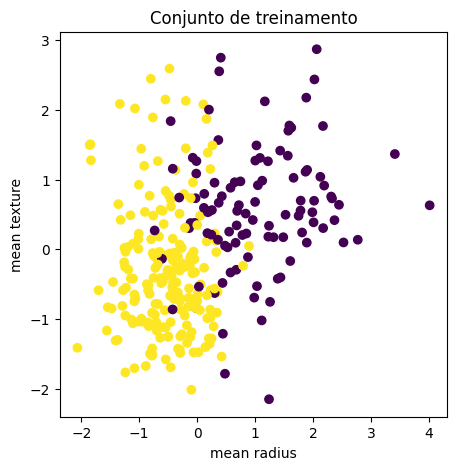

In [55]:
#feature selection: https://scikit-learn.org/stable/modules/feature_selection.html

plot_dataset(X_train[:, 0], X_train[:, 1], y_train)

In [59]:
model = LinearRegression().fit(X_train[:, 0:2], y_train)
y_pred = model.predict(X_train[:,0:2])

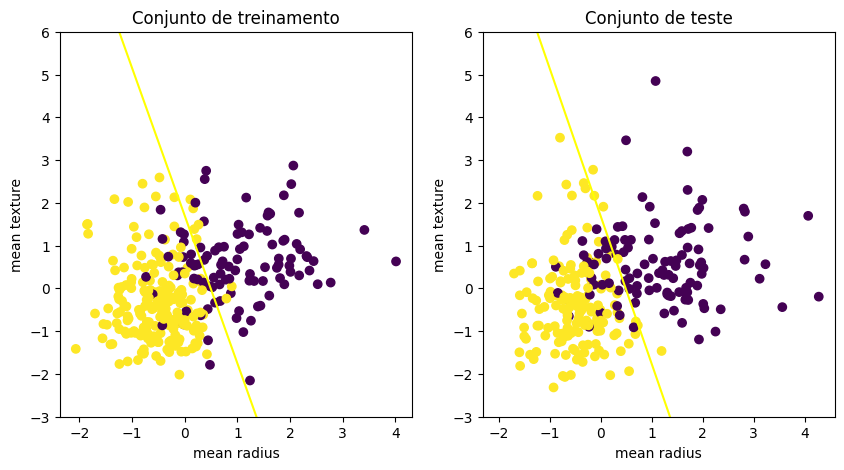

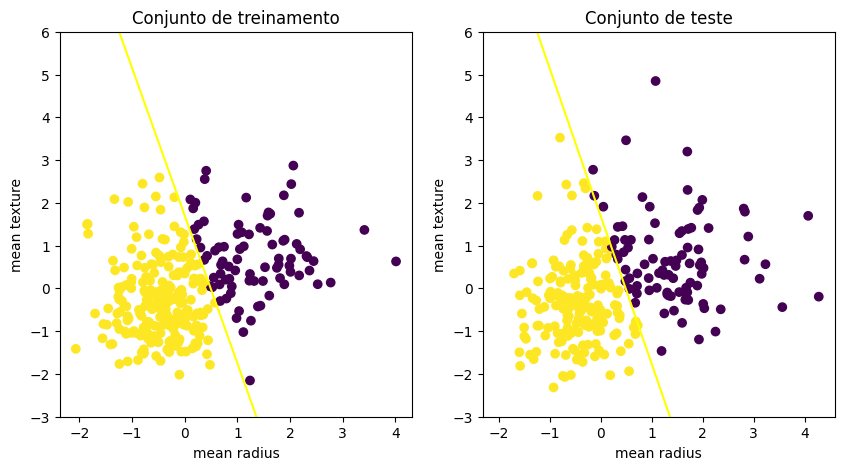

In [65]:

plot_model_predictions(model, X_train, X_test, y_train, y_test, plot_predict=False)
plot_model_predictions(model, X_train, X_test, y_train, y_test, plot_predict=True)

[Voltar ao sumário.](#topo)

### Parte 4: Avaliando o desempenho da regressão linear <a class="anchor" id="parte_04"></a>

Para avaliar o desempenho da nossa regressão linear, utilizaremos matrizes de confusão, que é uma maneira eficiente de visualizar os acertos em termos de tipo de erro: falsos positivos (não é câncer mas nosso classificador diz que é) e falsos negativos (um câncer que o classificador deixa de assinalar como tal).

In [66]:
def plot_confusion_matrix(y, y_pred):
    data = {'y': y, 'y_pred': y_pred }
    df = pd.DataFrame(data, columns=['y','y_pred'])
    cm = pd.crosstab(df['y'], df['y_pred'], rownames=['classe real'], colnames=['classe prevista'])
    sn.heatmap(cm, annot=True)
    plt.show()

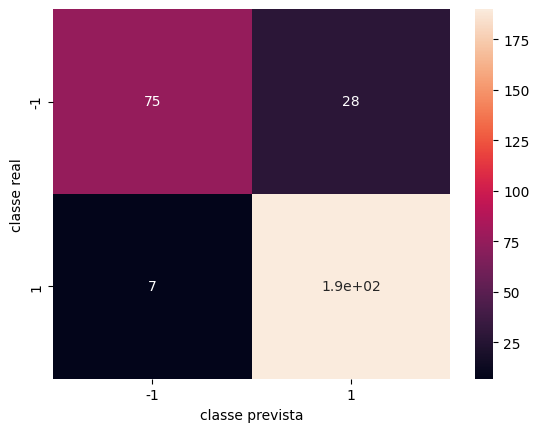

In [67]:
ytrain = model.predict(X_train[:, 0:2])
ytrain = np.where(ytrain < 0, -1, 1)

plot_confusion_matrix(y_train, ytrain)

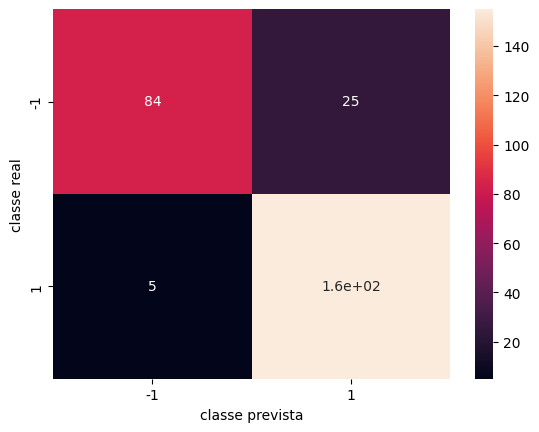

In [70]:
ytest = model.predict(X_test[:, 0:2])
ytest = np.where(ytest < 0, -1, 1)

plot_confusion_matrix(y_test, ytest)

[Voltar ao sumário.](#topo)

### Parte 5: Classificando "breast cancer" com todas as variáveis <a class="anchor" id="parte_05"></a>
    
Podemos verificar se conseguimos melhorar a classificação acima repetindo a regressão linear utilizando desta vez todas as variáveis.

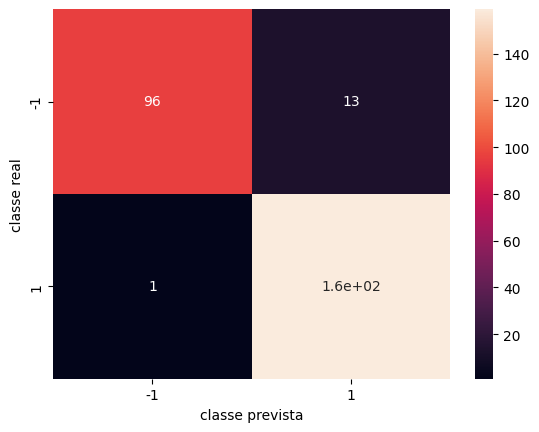

In [74]:
model = LinearRegression().fit(X_train, y_train)

ytest = model.predict(X_test)
ytest = np.where(ytest < 0, -1, 1)

plot_confusion_matrix(y_test, ytest)

[Voltar ao sumário.](#topo)

